# Graph visualization

## Students' cooperation

The following code is used to generate a graph illustrating cooperation between students while solving homework assignments at the University of Ben-Gurion of the Negev in Israel. 

Students’ Cooperation Social Network was constructed from the data collected during a “Computer and Network Security” course; a mandatory course at Ben-Gurion University. The social network contains data collected from 185 participating students from two different departments. The course’s social network was created by analyzing the implicit and explicit cooperation among the students while doing their homework assignments. 
The students’ cooperation graph contained 185 nodes and 360 links and 3 types of links.

Downloaded From: http://proj.ise.bgu.ac.il/sns

Publications: Predicting Student Exam's Scores by Analyzing Social Network Data , Michael Fire, Gilad Katz, Yuval Elovici, Bracha Shapira, and Lior Rokach, 2012.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Loading a data frame containing information about the edges and their type

edges = pd.read_csv('data/multigraph_hashAnonymized.csv')
edges

,Id1,Id2,type
0,1,81,Partners
1,1,81,Time
2,2,27,Time
3,2,136,Time
4,2,129,Partners
...,...,...,...
355,168,181,Partners
356,171,182,Partners
357,172,183,Partners
358,174,180,Partners


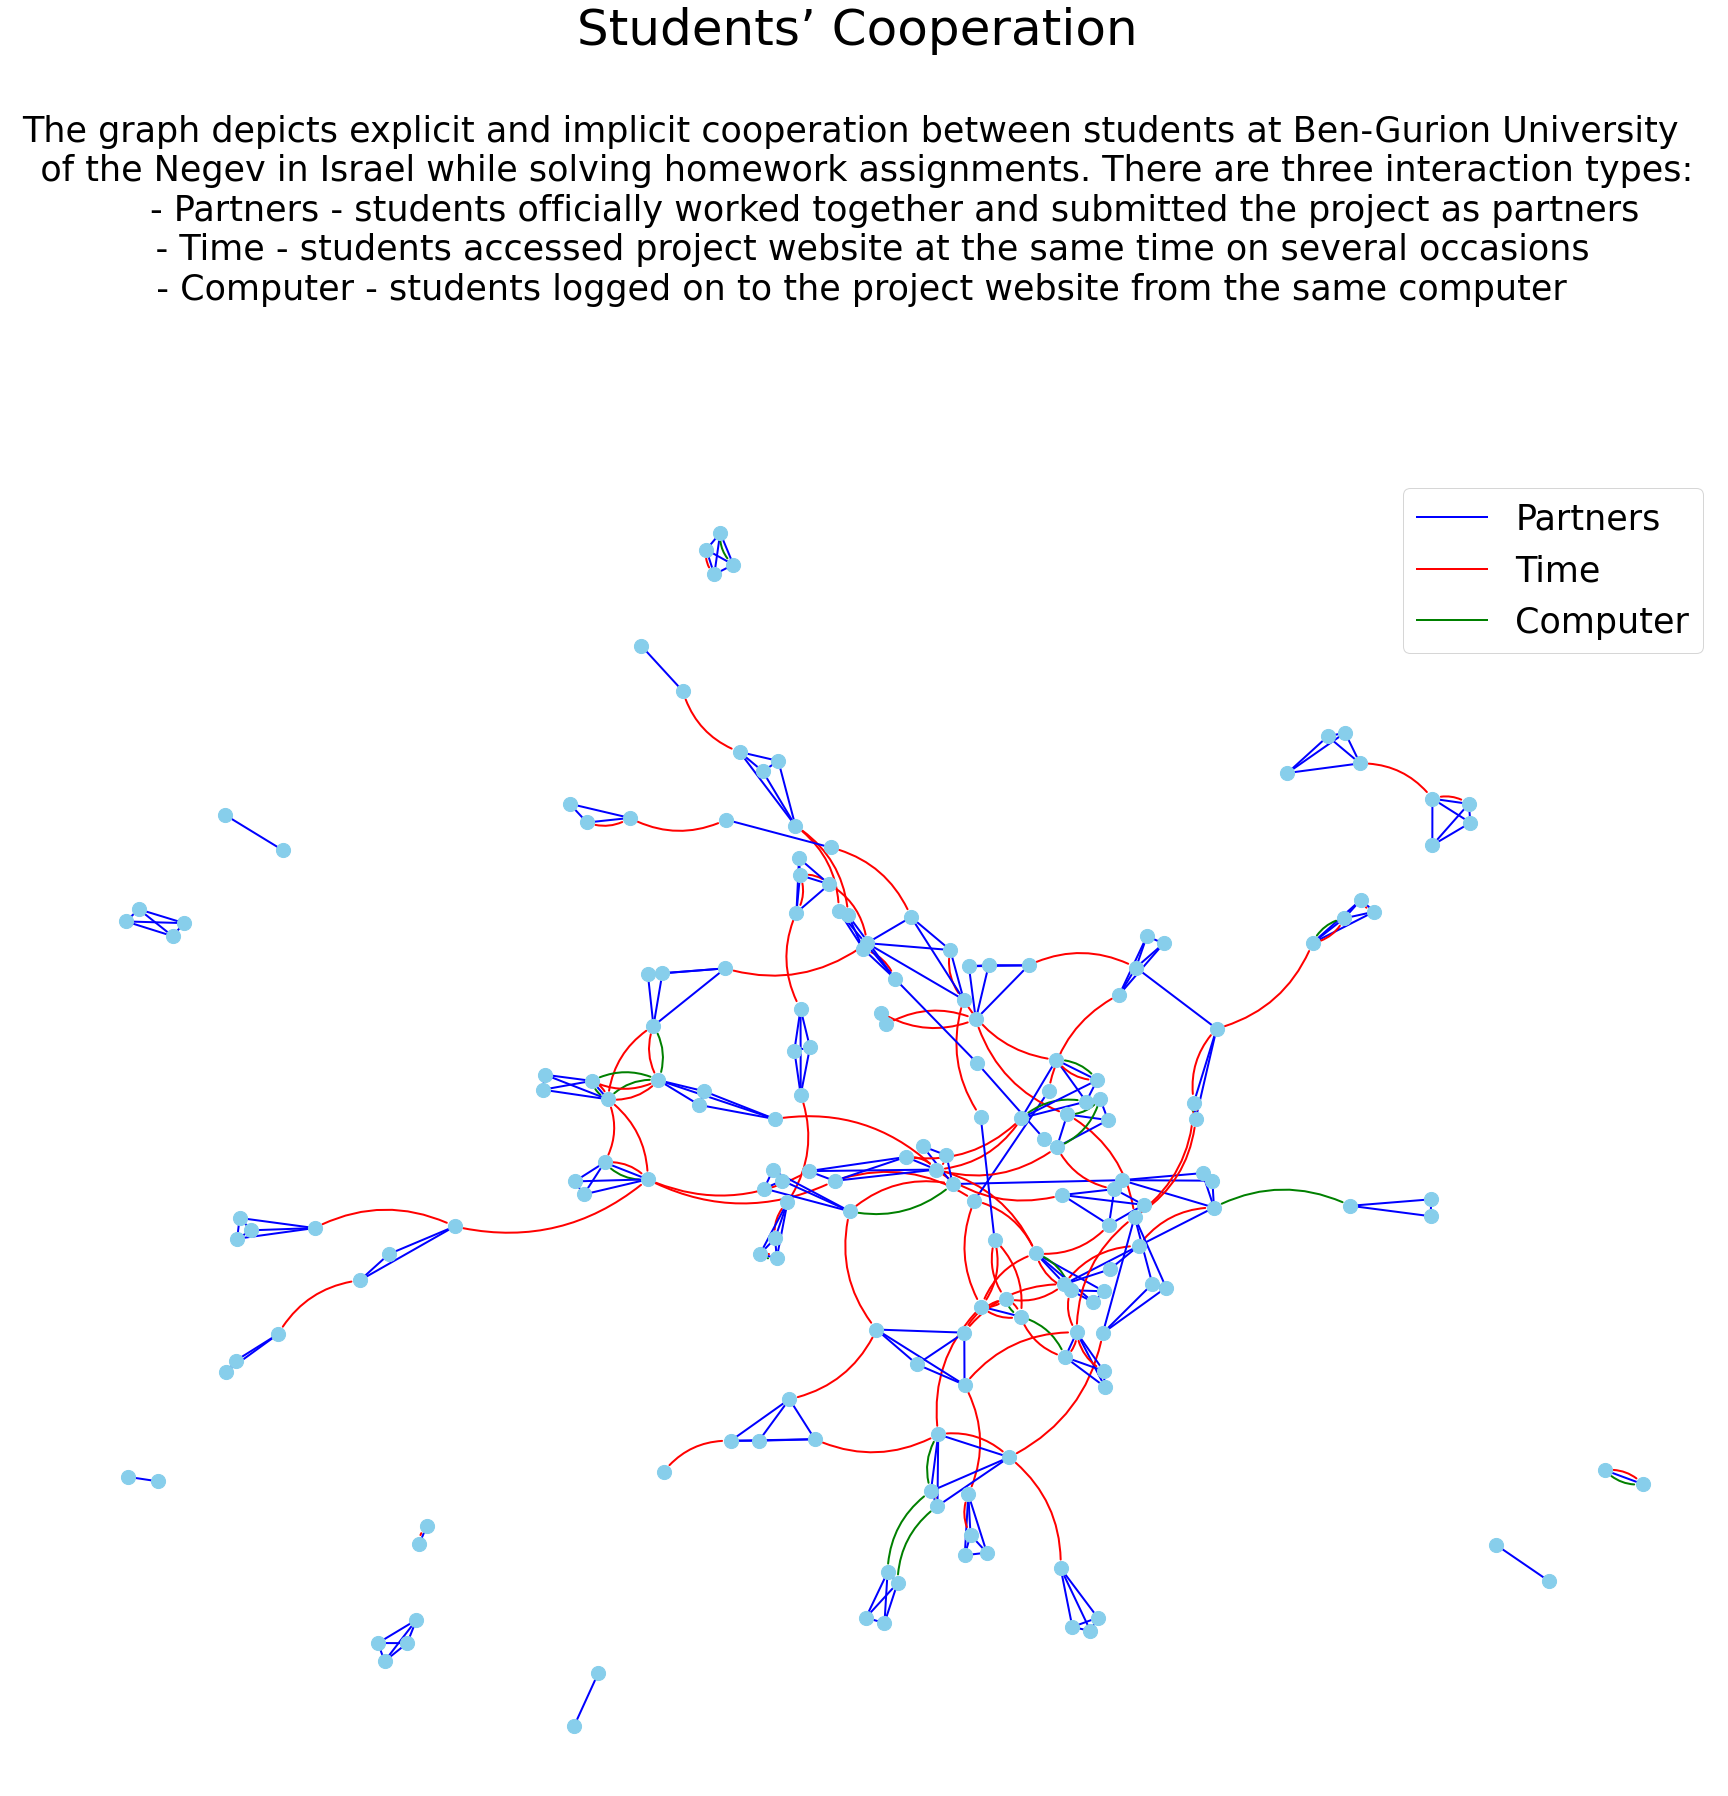

In [3]:
# Creating a multigraph

G = nx.MultiGraph()

# Creating a multigraph

G = nx.MultiGraph()

# Adding edges and attributes to a graph based on data from a CSV file

for index, row in edges.iterrows():
    G.add_edge(row['Id1'], row['Id2'], type=row['type'])

# Create a dictionary mapping edge types to colours

edge_colors = {'Partners': 'blue', 'Time': 'red', 'Computer': 'green'}

# Setting the position of the vertices

pos = nx.spring_layout(G, k = 0.1)

# Create a graph drawing

fig, ax = plt.subplots(2, 1, figsize=(30, 30), gridspec_kw={'height_ratios': [1, 8]})  # two parts, bigger for graph

# Drawing edges

for u, v, data in G.edges(data=True):
    edge_type = data['type']
    if edge_type == 'Partners':
        edge_color = edge_colors['Partners']
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color=edge_color, ax=ax[1])
    elif edge_type == 'Time':
        arc_rad = 0.25
        edge_color = edge_colors['Time']
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color=edge_color, connectionstyle=f'arc3, rad={arc_rad}', arrows=True, ax=ax[1])
    elif edge_type == 'Computer':
        arc_rad = -0.25
        edge_color = edge_colors['Computer']
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, edge_color=edge_color, connectionstyle=f'arc3, rad={arc_rad}', arrows=True, ax=ax[1])


# Drawing vertices

nx.draw(G, pos, with_labels=False, node_size=200, node_color='skyblue', font_size=10, font_color='white', edgelist=[], ax=ax[1])

# Creating a legend for edge colours

ax[1].legend(handles=[plt.Line2D([0], [0], color=color, lw=2, label=label) for label, color in edge_colors.items()], fontsize=35)

# Addition of explanatory text at the top, above the graph

ax[0].text(0.48, 0.1, 
"""The graph depicts explicit and implicit cooperation between students at Ben-Gurion University
   of the Negev in Israel while solving homework assignments. There are three interaction types:
        - Partners - students officially worked together and submitted the project as partners
    - Time - students accessed project website at the same time on several occasions
  - Computer - students logged on to the project website from the same computer""", 
    fontsize=35, 
    verticalalignment="bottom",
    horizontalalignment="center",
    transform=ax[0].transAxes)  

ax[0].axis('off')

# Putting the title in the middle

fig.suptitle('Students’ Cooperation', fontsize=50, y=0.95)

# Showing the drawing

plt.show()

In [4]:
fig.savefig('students_cooperation_graph.png')